In [1]:
from google.colab import files
uploaded = files.upload()

Saving Arduino3 (1).xlsx to Arduino3 (1).xlsx


# Arduino Carro - Versão 1

Este notebook mostra a análise dos dados obtidos com o Tracker sobre o movimento do carrinho Arduino.

Gráficos gerados:
- Posição x Tempo
- Velocidade x Tempo
- Aceleração x Tempo (real e modelo)


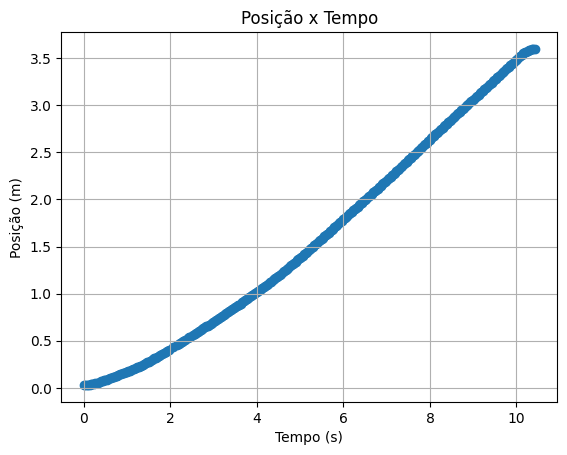

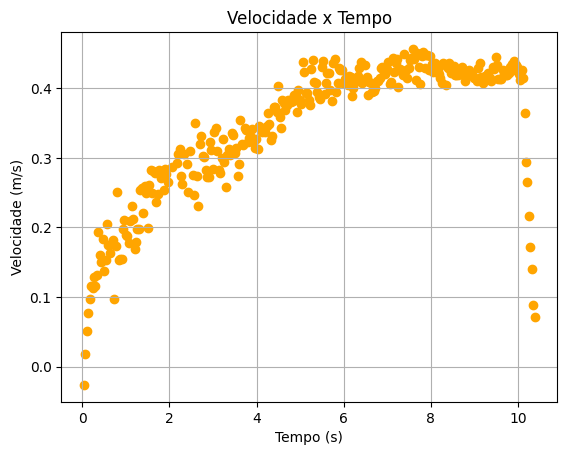

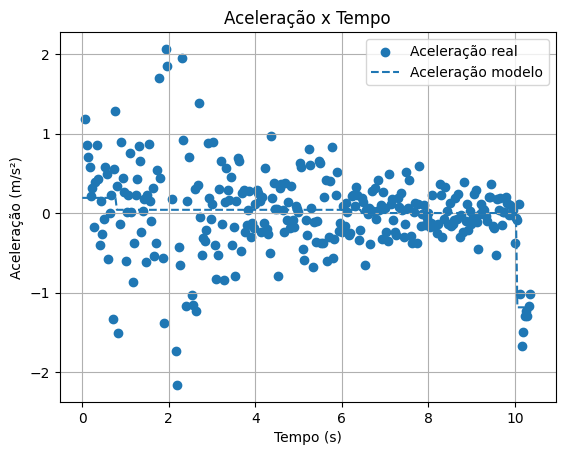

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o Excel (Planilha1, a partir da linha 3)
df = pd.read_excel("Arduino3 (1).xlsx", sheet_name="Planilha1", skiprows=2)

# Renomeando colunas
df.columns = ['index', 'tempo', 'posicao', 'velocidade', 'aceleracao', 'acel_modelo', 'forca']
df = df.drop(columns=['index'])

# Convertendo tudo para número (ignorar textos)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Remover linhas em branco
df = df.dropna(subset=['tempo', 'posicao'])

# Gráfico posição x tempo
plt.figure()
plt.scatter(df['tempo'], df['posicao'])
plt.title('Posição x Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.grid()
plt.show()

# Gráfico 2: Velocidade x Tempo
plt.figure()
plt.scatter(df['tempo'], df['velocidade'], color='orange')
plt.title('Velocidade x Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.grid()
plt.show()

# Gráfico 3: Aceleração real vs modelo
plt.figure()
plt.scatter(df['tempo'], df['aceleracao'], label='Aceleração real')
plt.plot(df['tempo'], df['acel_modelo'], linestyle='--', label='Aceleração modelo')
plt.title('Aceleração x Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Aceleração (m/s²)')
plt.legend()
plt.grid()
plt.show()